# [NLP] Assignment 1: Tokenization

Arina Yartseva B21-AAI-01

In this assignment, you need to tokenize the text of the Twitter(X) users posts(tweets). The assignment consists of two tasks. When you finish all the tasks, create a GitHub repository for this assignment (you can use this repo later for the other assignments) and submit this notebook in the repository. Leave `requirements.txt` file if your code requires additional installations. Submit the link to the repository in Moodle.

The [data](https://drive.google.com/file/d/15x_wPAflvYQ2Xh38iNQGrqUIWLj5l5Nw/view?usp=share_link) contains 5 files whereby each contains 44 tweets. Each tweet is separated by a newline.

## Task 1. Tokenize some tweets manually (20 points)

As a first task you need to tokenize first 15 tweets from `file2` by hand. This will allow you to understand the problem from a linguistic point of view. The guidelines for tweet tokenization are as follows:

- Each smiley is a separate token
- Each hashtag is an individual token. Each user reference is an individual token
- If a word has spaces between them then it is converted to a single token
- All punctuations are individual tokens. This includes double-quotes and single quotes also
- A URL is a single token

Example of output

    Input tweet
    @xfranman Old age has made N A T O!

    Tokenized tweet (separated by comma)
    @xfranman , Old , age , has , made , NATO , !


    1. Input tweet
    Camping in Maine for the weekend. Hey Dad, Mama Loves YOU: http://www.mamapalooza.com
    1. Tokenized tweet
    Camping, in, Maine, for, the, weekend, Hey, Dad, Mama, Loves, YOU, :, http://www.mamapalooza.com

    2. Input tweet
    Its american tradition bitch
    2. Tokenized tweet
    Its, american, tradition, bitch

    3. Input tweet
    @ThroughTheVoid They love it! The only pleasure they get in life. I actually do that. I'm sure I hear a tiny squeak... Then louder ones
    3. Tokenized tweet
    @ThroughTheVoid, They, love, it, The, only, pleasure, they, get, in, life, I, actually, do, that, Im, sure, I, hear, a, tiny, squeak, Then, louder, ones, !

    4. Input tweet
    " RT @latti: @AbsoHilare stop tweeting in church! Lol <--- ""I tweet because I'm happy, I tweet because I'm free"" LOL!"
    4. Tokenized tweet
    ", RT, @latti, :, @AbsoHilare, stop, tweeting, in, church, Lol, <---, ", ", I, tweet, because, Im, happy, I, tweet, because, Im, free, ", ", LOL, ", !

    5. Input tweet
    Samsung Mini S2 portable HDD graced with colors that perfectly match your tacky beach gear: Sammy's done it aga.. http://tinyurl.com/lb5p6m
    5. Tokenized tweet
    Samsung, Mini, S2, portable, HDD, graced, with, colors, that, perfectly, match, your, tacky, beach, gear, :, Sammys, done, it, aga, . , . , http://tinyurl.com/lb5p6m

    6. Input tweet
    @dialloc congrats on finding your way over. it may be slow going at first. hang in there. it's kinda cool when u get up to speed.
    6. Tokenized tweet
    @dialloc, congrats, on, finding, your, way, over, it, may, be, slow, going, at, first, hang, in, there, its, kinda, cool, when, u, get, up, to, speed.

    7. Input tweet
    iPhone activation delays continue, Apple offers $30 http://twt.gs/l3Ki
    7. Tokenized tweet
    iPhone, activation, delays, continue, Apple, offers, $30, http://twt.gs/l3Ki

    8. Input tweet
    RT @GoogleAtWork Gmail maximum attachment size now 25MB http://bit.ly/62mjw Nice!!!
    8. Tokenized tweet
    @GoogleAtWork, RT, Gmail, maximum, attachment, size, now, 25MB, http://bit.ly/62mjw, Nice, !!!

    9. Input tweet
    RT @acfou The Ads Won Awards for Crispin; But Did Nothing for Client BurgerKing's Sales/Marketshare - Big Surprise - http://ping.fm/vw8TI
    9. Tokenized tweet
    @acfou, RT, The, Ads, Won, Awards, for, Crispin, But, Did, Nothing, for, Client, BurgerKings, Sales/Marketshare, -, Big, Surprise, -, http://ping.fm/vw8TI

    10. Input tweet
    Hey doll! Great I missed True Blood yday boo lol Rt @FrankBanuat78 @jhillstephens Hello Sunshine how are u today? :-)
    10. Tokenized tweet
    @FrankBanuat78, @jhillstephens, Hey, doll, Great, I, missed, True, Blood, yday, boo, lol, Rt, Hello, Sunshine, how, are, u, today, ?, :-)

    11. Input tweet
    Australian artist Pogo made these free songs primarily from sampled audio from Alice In Wonderland. http://www.last.fm/music/Pogo/Wonderland
    11. Tokenized tweet
    Australian, artist, Pogo, made, these, free, songs, primarily, from, sampled, audio, from, Alice, In, Wonderland, http://www.last.fm/music/Pogo/Wonderland

    12. Input tweet
    @mppritchard they wanted to sell all the preorders & then sell all of the ones they had in stock to those that just walked in. Can't do both
    12. Tokenized tweet
    @mppritchard, they, wanted, to, sell, all, the, preorders, &, then, sell, all, of, the, ones, they, had, in, stock, to, those, that, just, walked, in, Cant, do, both

    13. Input tweet
    Incoming: Frightened Rabbit, Sept. 22 (Tucson): If Fat Cat Records is going to send three great bands from Scot.. http://tinyurl.com/nz6xcv
    13. Tokenized tweet
    Incoming, Frightened, Rabbit, Sept, 22, (Tucson), If, Fat, Cat, Records, is, going, to, send, three, great, bands, from, Scot, http://tinyurl.com/nz6xcv

    14. Input tweet
    Hey @ginoandfran please greet philip! (GinoandFran live > http://ustre.am/2YyQ)
    14. Tokenized tweet
    @ginoandfran, Hey, please, greet, philip, (GinoandFran, live, >, http://ustre.am/2YyQ)

    15. Input tweet
    Ik weet niet wie er achter de T-Mobile iPhone Twitter zit maar ik vind het niet echt 'corporate' taalgebruik... Best vreemd eigenlijk
    15. Tokenized tweet
    Ik, weet, niet, wie, er, achter, de, T-Mobile, iPhone, Twitter, zit, maar, ik, vind, het, niet, echt, corporate, taalgebruik, Best, vreemd, eigenlijk

## Task 2. Implement [Byte-Pair Encoding(BPE)](https://arxiv.org/pdf/1508.07909.pdf) Tokenizer (80 points)

### Task 2.1. Implementation (60 points)

Implement the tokenizer as the BPETokenizer class:
* Implement `train` method that learns merges and builds the vocabulary of the specified `vocab_size` (25 points).
* Implement `tokenize` method that should tokenize the text according to the learnt merges (25 points).

Your code should have docstrings and comments (10 points).

In [5]:
from typing import List, Dict, Tuple
from collections import Counter, defaultdict

class BPETokenizer:
    def __init__(self, vocab_size: int) -> None:
        """
        Initialize the BPE Tokenizer.

        :param vocab_size: The size of the vocabulary.
        """
        self.vocab_size = vocab_size
        self.vocab = []
        self.word_freq = Counter()
        self.splits = {}
        self.merges = {}

    def train(self, corpus: List[str]) -> None:
        """
        Train the tokenizer on the given corpus to learn merges and build the vocabulary.

        :param corpus: A list of strings (sentences) to train on.
        """
        # Count the word frequency
        for document in corpus:
            # Split each document in corpus by whitespace and count
            words = document.strip().split()
            for word in words:
                self.word_freq[word] += 1

        # Initialize the splits for each word in the vocabulary
        for word in self.word_freq:
            self.splits[word] = list(word) + ["</w>"]

        # Create the initial vocabulary (set of unique characters)
        self.vocab = list(set(''.join(self.word_freq.keys()) + '</w>'))

        # Perform merges until the desired vocabulary size is reached
        while len(self.vocab) < self.vocab_size:
            # Find the most frequent pair
            pairs_freq = self._get_pairs_freq()

            if not pairs_freq:
                break

            best_pair = max(pairs_freq, key=pairs_freq.get)
            if pairs_freq[best_pair] < 2:
                # No pair is frequent enough to merge
                break

            # Merge the best pair and update vocabulary
            self._update_splits(best_pair)
            self.merges[best_pair] = best_pair[0] + best_pair[1]
            self.vocab.append(best_pair[0] + best_pair[1])

    def _update_splits(self, pair: Tuple[str, str]) -> None:
        """
        Update the splits dictionary by merging all occurrences of the given pair.
        """
        for word, split in list(self.splits.items()):
            new_split = []
            i = 0
            while i < len(split):
                if i < len(split) - 1 and (split[i], split[i+1]) == pair:
                    new_split.append(pair[0] + pair[1])
                    i += 2
                else:
                    new_split.append(split[i])
                    i += 1
            self.splits[word] = new_split

    def _get_pairs_freq(self) -> Dict[Tuple[str, str], int]:
        """
        Compute the frequency of each pair of adjacent symbols in the corpus.
        """
        pairs_freq = defaultdict(int)
        for word, freq in self.word_freq.items():
            word_symbols = self.splits[word]
            for i in range(len(word_symbols) - 1):
                pair = (word_symbols[i], word_symbols[i+1])
                pairs_freq[pair] += freq
        return pairs_freq
    
    def tokenize(self, text: str) -> List[str]:
        """
        Tokenize the given text according to the learnt merges.

        :param text: The text to tokenize.
        :return: A list of tokens.
        """
        # Split text into symbols
        symbols = list(text) + ["</w>"]
        tokens = []
        i = 0
        while i < len(symbols):
            pair_found = False
            # Check if any of the learned merges can be applied
            for j in range(i, len(symbols) - 1):
                pair = (symbols[j], symbols[j+1])
                if pair in self.merges:
                    tokens.append(self.merges[pair])
                    i = j + 2  # Skip over the merged pair
                    pair_found = True
                    break
            if not pair_found:
                tokens.append(symbols[i])
                i += 1
        return tokens


### Task 2.2. Analysis on Tweets Dataset (10 points)

Train the BPE tokenizer on the tweets dataset. Try to tokenize the tweets with the tokenizer of different `vocab_size`. For example, train the BPE tokenizer with `vocab_size` of [base_vocab_size, 250, 500, 750, 1000]. Plot the dependency of the average length of the tokenized tweet by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized tweet on average. Tell what `vocab_size` is preferrable and why.

In [6]:
import matplotlib.pyplot as plt

def analyze_bpe_for_file(file_path: str):
    """
    Analyze the impact of different vocabulary sizes on the average length of tokenized text.
    
    :param file_path: path to file with will be analyzed
    """
    # Read the content of the file
    with open(file_path, 'r', encoding='utf-8') as file:
        tweets = file.readlines()

    # Initialize variables for analysis
    vocab_sizes = [50, 250, 500, 750, 1000]
    average_token_lengths = []

    # Perform BPE training and tokenization for each vocab size
    for vocab_size in vocab_sizes:
        tokenizer = BPETokenizer(vocab_size)
        tokenizer.train(tweets)
        tokenized_tweets = [tokenizer.tokenize(tweet) for tweet in tweets]
        avg_length = sum(len(tweet) for tweet in tokenized_tweets) / len(tokenized_tweets)
        average_token_lengths.append(avg_length)

    # Plotting the results
    plt.figure(figsize=(10, 6))
    print(average_token_lengths, vocab_sizes)
    plt.plot(vocab_sizes, average_token_lengths, marker='o', label=file_path.split('/')[-1])
    plt.title('Average Length of Tokenized Tweet by Vocab Size')
    plt.xlabel('Vocabulary Size')
    plt.ylabel('Average Tokenized Tweet Length')
    plt.grid(True)
    plt.legend()
    plt.show()


In [7]:
file_paths_chosen = [
    'data/file1',
    'data/file2',
    'data/file3',
    'data/file4',
    'data/file5'
]

with open('data/merged_texts', 'w', encoding='utf-8') as outfile:
    for file_path in file_paths_chosen:
        with open(file_path, 'r', encoding='utf-8') as file:
            lines = file.readlines()

        for line in lines:
            outfile.write(line)


files = 'data/merged_texts'

[99.39090909090909, 23.818181818181817, 28.995454545454546, 30.568181818181817, 31.35] [50, 250, 500, 750, 1000]


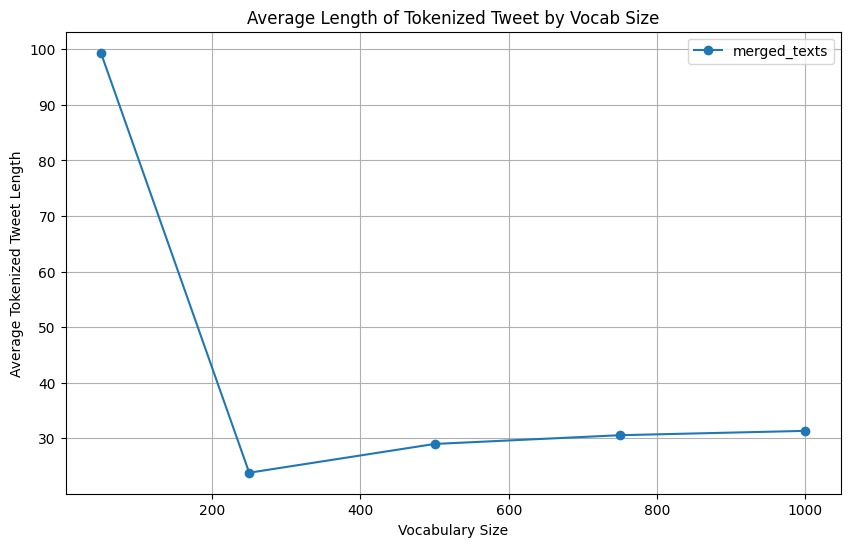

In [8]:
# for file_ in files:
#     analyze_bpe_for_file(file_)

analyze_bpe_for_file(files)

##### Tell what `vocab_size` is preferrable and why.
The plot displays a steep decline in the average length of tokenized text as the vocabulary size increases from 50 to around 200, after which the decrease becomes more gradual, plateauing as the vocabulary size approaches 1000. A preferable vocab_size appears to be around 200, where the average token length drops significantly compared to a vocab_size of 50 and then stabilizes. Choosing a vocab_size beyond 200 doesn't seem to offer a substantial benefit in terms of reducing the average token length. Therefore, 200 is an efficient choice that balances the benefits of a reduced token length with the potential costs of an unnecessarily large vocabulary.

### Task 2.3. Analysis on Dataset of Different Language (10 points)

Find a small dataset of texts in a language other than English. The dataset size should be not greater than several megabytes.

Train the BPE tokenizer on the dataset that you found. Try to tokenize the sentences from this dataset with the tokenizer of different `vocab_size`. Plot the dependency of the average length of the tokenized sentence by `vocab_size` to analyze how `vocab_size` affects the length of the tokenized sentence on average.

Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why. 

[DiaBLa Dataset on GitHub](https://github.com/rbawden/DiaBLa-dataset/blob/master/DiaBLa-corpus/raw-corpus/diabla.en2fr.ref)

[51.67155322862129, 15.898778359511343, 17.25724258289703, 17.952879581151834, 18.09493891797557] [50, 250, 500, 750, 1000]


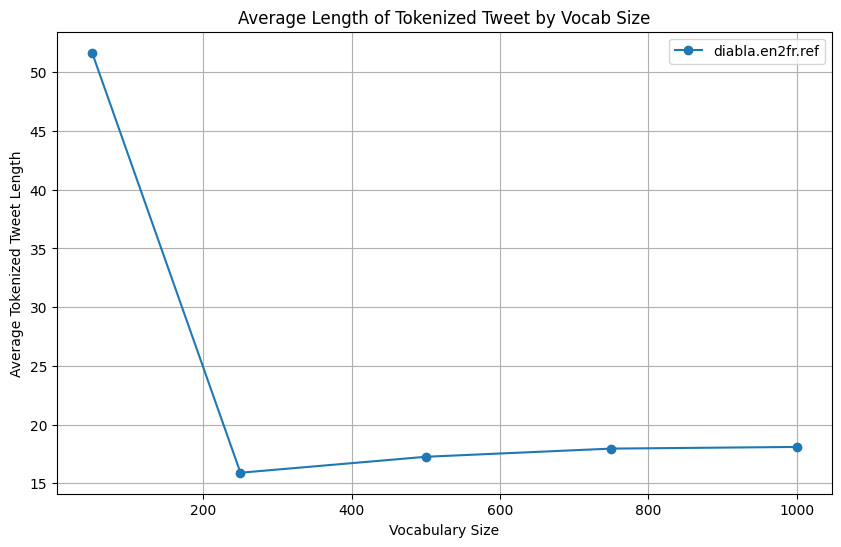

In [9]:
file_path = 'data/diabla.en2fr.ref'

analyze_bpe_for_file(file_path)

##### Tell how how the average length of the tokenized sentence differs from the average length of the tokenized tweet. Explain why.
The average length of tokenized sentences in this dataset initially decreases sharply with an increase in vocabulary size, leveling off as the vocabulary size grows beyond 200. This pattern suggests that a small vocabulary captures the most frequent tokens efficiently, but as the vocabulary size increases, the incremental gain in reducing token length diminishes. 

Comparing this with the average length of tokenized tweets, we may observe different patterns due to several factors: the nature of the language (tweets being more informal and potentially repetitive), the type of dataset (tweets may contain more slang, abbreviations, and hashtags), and the language itself (French vs. English, with different linguistic characteristics affecting tokenization). The stabilization in token length reduction might occur at different vocabulary sizes, reflecting these differences in dataset and language structure.